In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
%matplotlib inline
 

In [2]:
class Perceptron:
    
    def __init__(self, eta=0.10, epochs=50, is_verbose = False):
        
        self.eta = eta
        self.epochs = epochs
        self.is_verbose = is_verbose
        self.list_of_errors = []
        
    
    def predict(self, x):
        
        ones = np.ones((x.shape[0],1))
        x_1 = np.append(x.copy(), ones, axis=1)
        #activation = self.get_activation(x_1)
        #y_pred = np.where(activation >0, 1, -1)
        #return y_pred
        return np.where(self.get_activation(x_1) > 0, 1, -1)
        
    
    def get_activation(self, x):
        
        activation = np.dot(x, self.w)
        return activation
     
    
    def fit(self, X, y):
        
        self.list_of_errors = []
        
        ones = np.ones((X.shape[0], 1))
        X_1 = np.append(X.copy(), ones, axis=1)
 
        self.w = np.random.rand(X_1.shape[1])
        
        for e in range(self.epochs):
 
            error = 0
            
            activation = self.get_activation(X_1)
            delta_w = self.eta * np.dot((y - activation), X_1)
            self.w += delta_w
                
            error = np.square(y - activation).sum()/2.0
                
            self.list_of_errors.append(error)
            
            if(self.is_verbose):
                print("Epoch: {}, weights: {}, error {}".format(
                        e, self.w, error))

In [3]:
diag = pd.read_csv('../ml_data/breast_cancer.csv')

In [4]:
X = diag[['area_mean', 'area_se', 'texture_mean', 'concavity_worst', 'concavity_mean']]

In [5]:
X.head()

,area_mean,area_se,texture_mean,concavity_worst,concavity_mean
0,1001.0,153.40,10.38,0.7119,0.3001
1,1326.0,74.08,17.77,0.2416,0.0869
2,1203.0,94.03,21.25,0.4504,0.1974
3,386.1,27.23,20.38,0.6869,0.2414
4,1297.0,94.44,14.34,0.4000,0.1980


In [6]:
y = diag['diagnosis']

In [7]:
y.head()

0    M
1    M
2    M
3    M
4    M
Name: diagnosis, dtype: object

In [8]:
y = y.apply(lambda x: 1 if x == 'M' else -1 )

In [9]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int64

In [10]:
p = Perceptron(eta = 0.000000001, epochs=100, is_verbose=True)

In [11]:
p.fit(X, y)

Epoch: 0, weights: [0.20412681 0.76297441 0.26331845 0.23339444 0.72882394 0.37268418], error 23751393.650340065
Epoch: 1, weights: [0.12081248 0.75668871 0.26136912 0.23336214 0.72881215 0.37258729], error 11177265.36169982
Epoch: 2, weights: [0.06384495 0.75227555 0.26004504 0.23334013 0.72880404 0.3725216 ], error 5296696.128556773
Epoch: 3, weights: [0.02489497 0.74914302 0.25914854 0.23332516 0.72879846 0.37247726], error 2546480.193878315
Epoch: 4, weights: [-0.00173349  0.74688632  0.25854445  0.233315    0.7287946   0.37244752], error 1260225.6518088183
Epoch: 5, weights: [-0.01993575  0.74522862  0.2581403   0.23330813  0.72879193  0.37242775], error 658616.859807273
Epoch: 6, weights: [-0.03237566  0.74398062  0.25787289  0.23330351  0.72879006  0.37241481], error 377194.0118440011
Epoch: 7, weights: [-0.04087492  0.74301285  0.25769898  0.23330043  0.72878874  0.37240654], error 245511.47204023416
Epoch: 8, weights: [-0.04667934  0.74223679  0.257589    0.2332984   0.7287878

In [12]:
p.w

array([-0.05706415,  0.70919393,  0.25977836,  0.23331555,  0.72877521,
        0.37254714])

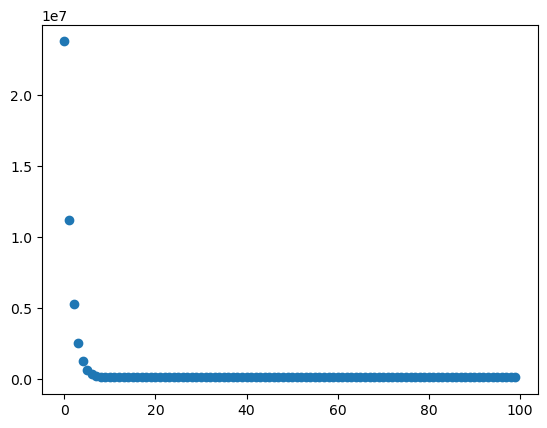

In [13]:
plt.scatter(range(p.epochs), p.list_of_errors)

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
scaler = StandardScaler()

In [25]:
scaler.fit(X)

StandardScaler()

In [27]:
X_std = scaler.transform(X)

In [30]:
X_std

array([[ 0.9843749 ,  2.48757756, -2.07333501,  2.10952635,  2.65287398],
       [ 1.90870825,  0.74240195, -0.35363241, -0.14674897, -0.02384586],
       [ 1.55888363,  1.18133606,  0.45618695,  0.85497394,  1.36347845],
       ...,
       [ 0.57795264,  0.1806983 ,  2.0455738 ,  0.3267666 ,  0.04658753],
       [ 1.73521799,  1.0095027 ,  2.33645719,  3.19760468,  3.296944  ],
       [-1.34778924, -0.46615196,  1.22179204, -1.30583065, -1.11487284]])

In [31]:
p = Perceptron(eta = 0.01, epochs=100, is_verbose=True)

In [32]:
p.fit(X_std, y)

Epoch: 0, weights: [-4.14296836 -4.23139917 -4.79557495 -3.71273861 -4.39564794 -3.40223787], error 622.1516807597347
Epoch: 1, weights: [79.34258574 72.39093124 52.52411349 72.72437316 82.41276262 14.50649559], error 87111.60134222734
Epoch: 2, weights: [-1327.52925833 -1224.24526387  -762.41922207 -1232.03928774
 -1402.92295759   -69.48546433], error 23280503.003776252
Epoch: 3, weights: [22265.77029314 20543.89908211 12337.83373348 20699.88819384
 23575.94259373   324.4368277 ], error 6503519232.385018
Epoch: 4, weights: [-372887.93338758 -344138.27907519 -204939.68473401 -346770.70507843
 -395012.12771913   -1523.05872191], error 1822329763679.5483
Epoch: 5, weights: [6243217.97720557 5762177.77664618 3424922.48918922 5806206.85476028
 6614191.7751421     7141.69540577], error 510739890508248.9
Epoch: 6, weights: [-1.04522113e+08 -9.64699802e+07 -5.73150725e+07 -9.72063760e+07
 -1.10734632e+08 -3.34960015e+04], error 1.4314609662570629e+17
Epoch: 7, weights: [1.74984921e+09 1.61505

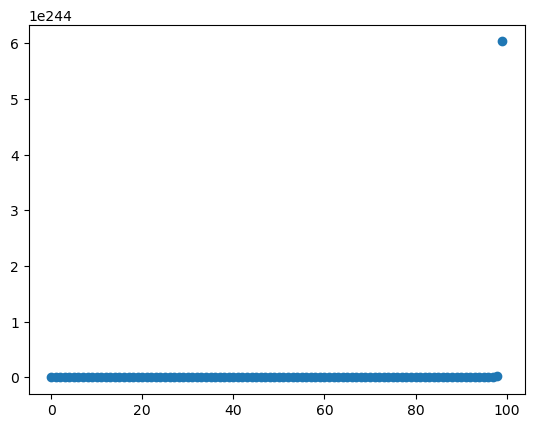

In [33]:
plt.scatter(range(p.epochs), p.list_of_errors)

In [34]:
p = Perceptron(eta=0.0001)

In [35]:
p.fit(X_std, y)

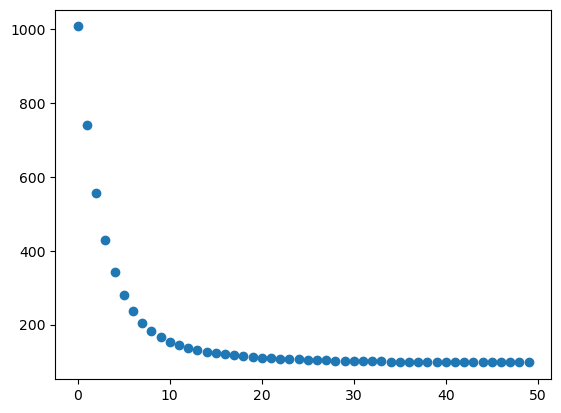

In [36]:
plt.scatter(range(p.epochs), p.list_of_errors)

In [37]:
p = Perceptron(eta=0.000000001)

In [38]:
p.fit(X_std, y)

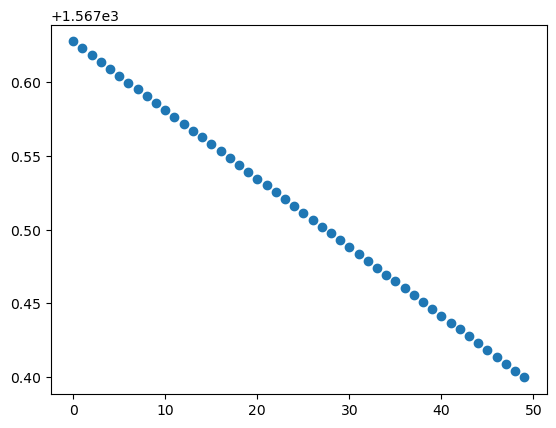

In [39]:
plt.scatter(range(p.epochs), p.list_of_errors)

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X_train, X_test, Y_train, Y_test = train_test_split(X_std, y , test_size=0.2)

In [42]:
p = Perceptron(eta=0.001, epochs=100)

In [43]:
p.fit(X_train, Y_train)

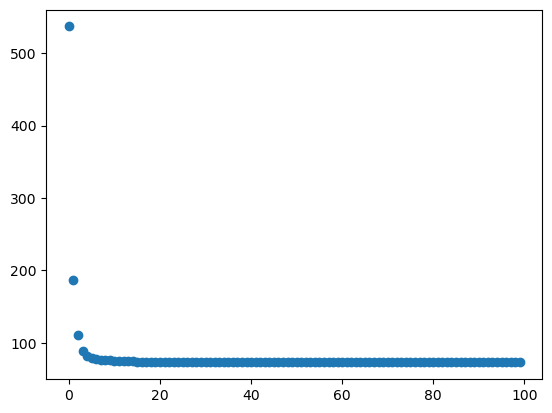

In [44]:
plt.scatter(range(p.epochs), p.list_of_errors)

In [46]:
y_pred = p.predict(X_test)

In [47]:
good = Y_test[Y_test == y_pred].count() 

In [48]:
good

105

In [51]:
total = Y_test.count()

In [52]:
total

114

In [53]:
good / total

0.9210526315789473

In [54]:
print('result: {}'.format(100*good/total))

result: 92.10526315789474
